In [1]:
import os
import pandas as pd
os.environ["JAVA_HOME"] = "/scratch/sg7729/jdk8u292-b10/"
os.environ["SPARK_HOME"] = "/scratch/sg7729/spark-3.1.1-bin-hadoop3.2/"

In [2]:
# !gdown --folder https://drive.google.com/drive/folders/1VP1HXNXPVKbdLf6J_lwvZirKh34rauJn

# import os

# # Your directory path
# directory_path = '/home/sg7729/.local/bin'

# # Add the directory to the PATH environment variable
# os.environ['PATH'] = f"{directory_path}:{os.environ['PATH']}"


In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

23/12/05 01:17:19 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [4]:

data_folder = '/scratch/sg7729/Big data Project/Bigdata/'
high_volume_filename = '/scratch/sg7729/Big data Project/Bigdata/high_volume.csv'
green_taxi_filename = '/scratch/sg7729/Big data Project/Bigdata/green_taxi.csv'
yellow_taxi_filename = '/scratch/sg7729/Big data Project/Bigdata/yellow_taxi.csv'

In [5]:
green_taxi_data = spark.read.csv(green_taxi_filename, header=True)
high_volume_data= spark.read.csv(high_volume_filename, header=True)
yellow_taxi_data = spark.read.csv(yellow_taxi_filename, header=True)

In [6]:

# Display the schema of each DataFrame
print("Green Taxi Data Schema:")
# Drop the _c0 column
green_taxi_data = green_taxi_data.drop("_c0")

# Show the updated schema
green_taxi_data.printSchema()

Green Taxi Data Schema:
root
 |-- VendorID: string (nullable = true)
 |-- lpep_pickup_datetime: string (nullable = true)
 |-- lpep_dropoff_datetime: string (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- RatecodeID: string (nullable = true)
 |-- PULocationID: string (nullable = true)
 |-- DOLocationID: string (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- trip_distance: string (nullable = true)
 |-- fare_amount: string (nullable = true)
 |-- extra: string (nullable = true)
 |-- mta_tax: string (nullable = true)
 |-- tip_amount: string (nullable = true)
 |-- tolls_amount: string (nullable = true)
 |-- ehail_fee: string (nullable = true)
 |-- improvement_surcharge: string (nullable = true)
 |-- total_amount: string (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- trip_type: string (nullable = true)
 |-- congestion_surcharge: string (nullable = true)



In [7]:
print("\nYellow Taxi Data Schema:")
# Drop the _c0 column
yellow_taxi_data = yellow_taxi_data.drop("_c0")

# Show the updated schema
yellow_taxi_data.printSchema()


Yellow Taxi Data Schema:
root
 |-- VendorID: string (nullable = true)
 |-- tpep_pickup_datetime: string (nullable = true)
 |-- tpep_dropoff_datetime: string (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- trip_distance: string (nullable = true)
 |-- RatecodeID: string (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: string (nullable = true)
 |-- DOLocationID: string (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- fare_amount: string (nullable = true)
 |-- extra: string (nullable = true)
 |-- mta_tax: string (nullable = true)
 |-- tip_amount: string (nullable = true)
 |-- tolls_amount: string (nullable = true)
 |-- improvement_surcharge: string (nullable = true)
 |-- total_amount: string (nullable = true)
 |-- congestion_surcharge: string (nullable = true)
 |-- Airport_fee: string (nullable = true)



In [8]:
print("\nHigh Volume Data Schema:")
# Drop the _c0 column
high_volume_data = high_volume_data.drop("_c0")

# Show the updated schema
high_volume_data.printSchema()


High Volume Data Schema:
root
 |-- hvfhs_license_num: string (nullable = true)
 |-- dispatching_base_num: string (nullable = true)
 |-- originating_base_num: string (nullable = true)
 |-- request_datetime: string (nullable = true)
 |-- on_scene_datetime: string (nullable = true)
 |-- pickup_datetime: string (nullable = true)
 |-- dropoff_datetime: string (nullable = true)
 |-- PULocationID: string (nullable = true)
 |-- DOLocationID: string (nullable = true)
 |-- trip_miles: string (nullable = true)
 |-- trip_time: string (nullable = true)
 |-- base_passenger_fare: string (nullable = true)
 |-- tolls: string (nullable = true)
 |-- bcf: string (nullable = true)
 |-- sales_tax: string (nullable = true)
 |-- congestion_surcharge: string (nullable = true)
 |-- airport_fee: string (nullable = true)
 |-- tips: string (nullable = true)
 |-- driver_pay: string (nullable = true)
 |-- shared_request_flag: string (nullable = true)
 |-- shared_match_flag: string (nullable = true)
 |-- access_a_ri

In [9]:

# Display summary statistics for numerical columns
print("\nSummary Statistics for Green Taxi Data:")
describe = green_taxi_data.describe().toPandas()
describe


Summary Statistics for Green Taxi Data:


,summary,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,count,65471,65471,65471,60856,60856,65471,65471,60856,65471,...,65471,65471,65471,65471,0,65471,65471,60856,60850,60856
1,mean,1.86911762459715,None,None,None,1.2339128434336795,98.81429946082999,139.7068625803791,1.3056724069935586,24.532310183134427,...,0.8813520489987934,0.5606528081135159,2.629762032044771,0.35879717737624456,None,0.9866093384857414,26.556306914511474,1.3360063099776522,1.0503368940016433,0.7494618443538846
2,stddev,0.33727424550658663,None,None,None,1.3315857251728263,58.663889801077836,76.30964291858551,0.952041011030087,1419.7627073621284,...,1.3655530981010449,0.3900912563939016,3.8093374360152854,1.6459113353051322,None,0.1390771481574622,25.157952921189754,0.5053545019906606,0.21864097673086985,1.2240548368510629
3,min,1,2009-01-01 00:02:17,2009-01-01 00:02:21,N,1.0,1,1,0.0,0.0,...,-1.0,-0.5,-0.01,0.0,None,-1.0,-1.5,1.0,1.0,-2.75
4,max,2,2023-10-01 00:04:22,2023-10-01 22:09:23,Y,99.0,98,98,9.0,9699.77,...,7.75,1.5,97.91,9.54,None,1.0,99.99,4.0,2.0,2.75


In [10]:

# Display summary statistics for numerical columns
print("\nSummary Statistics for high_volume_data Taxi Data:")
describe = high_volume_data.describe().toPandas()
describe


Summary Statistics for high_volume_data Taxi Data:


,summary,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,count,19851123,19851123,14322555,19851123,14322555,19851123,19851123,19851123,19851123,...,19851123,19851123,19851123,19851123,19851123,19851123,19851123,19851123,19851123,19851123
1,mean,None,None,None,None,None,None,None,139.02829446978893,142.54858251596144,...,2.1857537157981515,1.1089831416590386,0.21833354717513964,1.2137670347414884,20.93173105623699,None,None,None,None,None
2,stddev,None,None,None,None,None,None,None,74.5117474950376,77.52928081921164,...,1.8418987855618316,1.344003760047612,0.7096545486416245,3.465267753001917,17.78149697085538,None,None,None,None,None
3,min,HV0003,B02764,B00887,2023-08-31 23:00:29,2023-08-31 22:48:03,2023-09-01 00:00:00,2023-09-01 00:02:35,1,1,...,0.0,0.0,0.0,0.0,-0.01,N,N,,N,N
4,max,HV0005,B03412,B03412,2023-10-01 00:25:00,2023-09-30 23:59:54,2023-09-30 23:59:59,2023-10-01 06:36:47,99,99,...,98.64,8.25,6.9,99.98,99.99,Y,Y,N,Y,Y


In [11]:
# Display summary statistics for numerical columns
print("\nSummary Statistics for yellow_taxi_data Taxi Data:")
describe = yellow_taxi_data.describe().toPandas()
describe


Summary Statistics for yellow_taxi_data Taxi Data:


,summary,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,count,2846722,2846722,2846722,2706497,2846722,2706497,2706497,2846722,2846722,2846722,2846722,2846722,2846722,2846722,2846722,2846722,2846722,2706497,2706497
1,mean,1.7440705485115864,None,None,1.3564001733606208,4.274268084484537,1.6987667084057363,None,164.922829134703,163.92198887000558,1.164290014971606,20.671108622479235,1.5228740424951928,0.4845981799417013,3.6252894241160405,0.6359645128679355,0.9786580846320744,29.781937347590343,2.2502069095217916,0.16510927224378966
2,stddev,0.44318784783862375,None,None,0.8780650894231695,239.42400623924468,7.749988925403654,None,64.21351684745228,69.99598817070853,0.5742757212431161,141.82984298284424,6.210537124129854,0.11159648921240047,4.273227811383955,2.3075544153615573,0.20334830632481235,143.19578354747537,0.8181189446383896,0.5215599307414304
3,min,1,2008-12-31 15:05:04,2008-12-31 16:18:04,0.0,0.0,1.0,N,1,1,0,-0.01,-0.75,-0.5,-0.01,-1.75,-1.0,-0.69,-2.5,-1.75
4,max,6,2023-10-01 00:02:18,2023-10-02 16:27:54,9.0,99.5,99.0,Y,98,98,4,99.99,9.25,4.0,99.99,96.94,1.0,99.99,2.5,1.75


In [12]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, hour,dayofmonth
from pyspark.sql.types import TimestampType

In [13]:
# Convert datetime columns to timestamp
green_taxi_data = green_taxi_data.withColumn("pickup_datetime", col("lpep_pickup_datetime").cast(TimestampType()))
yellow_taxi_data = yellow_taxi_data.withColumn("pickup_datetime", col("tpep_pickup_datetime").cast(TimestampType()))
high_volume_data = high_volume_data.withColumn("pickup_datetime", col("pickup_datetime").cast(TimestampType()))

# Feature engineering - Extract hour of the day
green_taxi_data = green_taxi_data.withColumn("hour_of_day", hour(col("pickup_datetime")))
yellow_taxi_data = yellow_taxi_data.withColumn("hour_of_day", hour(col("pickup_datetime")))
high_volume_data = high_volume_data.withColumn("hour_of_day", hour(col("pickup_datetime")))

# Feature engineering - Extract day of the month
green_taxi_data = green_taxi_data.withColumn("day_of_the_month", dayofmonth(col("pickup_datetime")))
yellow_taxi_data = yellow_taxi_data.withColumn("day_of_the_month", dayofmonth(col("pickup_datetime")))
high_volume_data = high_volume_data.withColumn("day_of_the_month", dayofmonth(col("pickup_datetime")))


In [14]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, when, round
from pyspark.sql.types import FloatType

# Create Spark session
spark = SparkSession.builder.appName("FeatureEngineering").getOrCreate()

# Assuming your DataFrame is named 'df'
# If not, replace 'df' with the actual DataFrame name

# Task 1: Drop specified columns
columns_to_drop = ['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag',
                   'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'fare_amount',
                   'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
                   'payment_type', 'trip_type', 'pickup_datetime']

# df = green_taxi_data.drop(*columns_to_drop)
df = green_taxi_data

# Task 2: Convert and create a new column 'total_fare'
df = df.withColumn('total_amount', col('total_amount').cast(FloatType())) \
       .withColumn('congestion_surcharge', when(col('congestion_surcharge').cast(FloatType()).isNotNull(),
                                                 col('congestion_surcharge').cast(FloatType())).otherwise(0.0)) \
       .withColumn('total_fare', round(col('total_amount') + col('congestion_surcharge'), 2)) \
       .drop('total_amount', 'congestion_surcharge')

# Task 3: Print the range of the 'total_fare' column and create a new column 'fare_range'
fare_ranges = df.selectExpr("percentile_approx(total_fare, 0.1) as p10", "percentile_approx(total_fare, 0.2) as p20",
                            "percentile_approx(total_fare, 0.3) as p30", "percentile_approx(total_fare, 0.4) as p40",
                            "percentile_approx(total_fare, 0.5) as p50", "percentile_approx(total_fare, 0.6) as p60",
                            "percentile_approx(total_fare, 0.7) as p70", "percentile_approx(total_fare, 0.8) as p80",
                            "percentile_approx(total_fare, 0.9) as p90", "max(total_fare) as max_fare") \
                .collect()[0]

fare_range_dict = {
    'p10': fare_ranges['p10'],
    'p20': fare_ranges['p20'],
    'p30': fare_ranges['p30'],
    'p40': fare_ranges['p40'],
    'p50': fare_ranges['p50'],
    'p60': fare_ranges['p60'],
    'p70': fare_ranges['p70'],
    'p80': fare_ranges['p80'],
    'p90': fare_ranges['p90'],
    'max_fare': fare_ranges['max_fare']
}

df = df.withColumn('fare_range', 
                  when(col('total_fare') <= fare_range_dict['p10'], 10)
                  .when((col('total_fare') > fare_range_dict['p10']) & (col('total_fare') <= fare_range_dict['p20']), 20)
                  .when((col('total_fare') > fare_range_dict['p20']) & (col('total_fare') <= fare_range_dict['p30']), 30)
                  .when((col('total_fare') > fare_range_dict['p30']) & (col('total_fare') <= fare_range_dict['p40']), 40)
                  .when((col('total_fare') > fare_range_dict['p40']) & (col('total_fare') <= fare_range_dict['p50']), 50)
                  .when((col('total_fare') > fare_range_dict['p50']) & (col('total_fare') <= fare_range_dict['p60']), 60)
                  .when((col('total_fare') > fare_range_dict['p60']) & (col('total_fare') <= fare_range_dict['p70']), 70)
                  .when((col('total_fare') > fare_range_dict['p70']) & (col('total_fare') <= fare_range_dict['p80']), 80)
                  .when((col('total_fare') > fare_range_dict['p80']) & (col('total_fare') <= fare_range_dict['p90']), 90)
                  .when(col('total_fare') > fare_range_dict['p90'], 100)
                  .otherwise('Unknown'))

# Task 4: Repeat for 'trip_distance'
trip_distance_ranges = df.selectExpr("percentile_approx(trip_distance, 0.1) as p10", "percentile_approx(trip_distance, 0.2) as p20",
                                     "percentile_approx(trip_distance, 0.3) as p30", "percentile_approx(trip_distance, 0.4) as p40",
                                     "percentile_approx(trip_distance, 0.5) as p50", "percentile_approx(trip_distance, 0.6) as p60",
                                     "percentile_approx(trip_distance, 0.7) as p70", "percentile_approx(trip_distance, 0.8) as p80",
                                     "percentile_approx(trip_distance, 0.9) as p90", "max(trip_distance) as max_trip_distance") \
                         .collect()[0]

trip_distance_range_dict = {
    'p10': trip_distance_ranges['p10'],
    'p20': trip_distance_ranges['p20'],
    'p30': trip_distance_ranges['p30'],
    'p40': trip_distance_ranges['p40'],
    'p50': trip_distance_ranges['p50'],
    'p60': trip_distance_ranges['p60'],
    'p70': trip_distance_ranges['p70'],
    'p80': trip_distance_ranges['p80'],
    'p90': trip_distance_ranges['p90'],
    'max_trip_distance': trip_distance_ranges['max_trip_distance']
}

df = df.withColumn('trip_distance_range', 
                  when(col('trip_distance').cast(FloatType()).isNotNull(), col('trip_distance').cast(FloatType()))
                  .otherwise(0.0)) \
       .withColumn('trip_distance_range', 
                  when(col('trip_distance_range') <= trip_distance_range_dict['p10'], 10)
                  .when((col('trip_distance_range') > trip_distance_range_dict['p10']) & (col('trip_distance_range') <= trip_distance_range_dict['p20']), 20)
                  .when((col('trip_distance_range') > trip_distance_range_dict['p20']) & (col('trip_distance_range') <= trip_distance_range_dict['p30']), 30)
                  .when((col('trip_distance_range') > trip_distance_range_dict['p30']) & (col('trip_distance_range') <= trip_distance_range_dict['p40']), 40)
                  .when((col('trip_distance_range') > trip_distance_range_dict['p40']) & (col('trip_distance_range') <= trip_distance_range_dict['p50']), 50)
                  .when((col('trip_distance_range') > trip_distance_range_dict['p50']) & (col('trip_distance_range') <= trip_distance_range_dict['p60']), 60)
                  .when((col('trip_distance_range') > trip_distance_range_dict['p60']) & (col('trip_distance_range') <= trip_distance_range_dict['p70']), 70)
                  .when((col('trip_distance_range') > trip_distance_range_dict['p70']) & (col('trip_distance_range') <= trip_distance_range_dict['p80']), 80)
                  .when((col('trip_distance_range') > trip_distance_range_dict['p80']) & (col('trip_distance_range') <= trip_distance_range_dict['p90']), 90)
                  .when(col('trip_distance_range') > trip_distance_range_dict['p90'], 100)
                  .otherwise('Unknown'))

df = df.drop('trip_distance', 'total_fare')
green_taxi_cleaned_data = df

In [16]:
from pyspark.sql.functions import col, sum, when, round, count
# Task 1: Add a new column 'hourly_trip_count' by counting the number of rows
x = green_taxi_cleaned_data.groupBy("hour_of_day").agg(count("*").alias("hourly_trip_count"))
# Assuming 'hour_of_day' is the common column for joining
green_taxi_cleaned_data = green_taxi_cleaned_data.join(x, "hour_of_day", "inner")

In [17]:

green_taxi_cleaned_data = green_taxi_cleaned_data.select("hour_of_day", "day_of_the_month", "fare_range", "trip_distance_range", "hourly_trip_count")

green_taxi_cleaned_data = green_taxi_cleaned_data.dropDuplicates(["hour_of_day", "day_of_the_month", "fare_range", "trip_distance_range", "hourly_trip_count"])

In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, when, round
from pyspark.sql.types import FloatType

# Create Spark session
spark = SparkSession.builder.appName("FeatureEngineering").getOrCreate()

# Assuming your DataFrame is named 'df'
# If not, replace 'df' with the actual DataFrame name

# Task 1: Drop specified columns
columns_to_drop = ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag',
                   'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'fare_amount',
                   'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
                   'payment_type', 'trip_type', 'pickup_datetime']

# df = yellow_taxi_data.drop(*columns_to_drop)
df = yellow_taxi_data
# Task 2: Convert and create a new column 'total_fare'
df = df.withColumn('total_amount', col('total_amount').cast(FloatType())) \
       .withColumn('Airport_fee', when(col('Airport_fee').cast(FloatType()).isNotNull(),
                                                 col('Airport_fee').cast(FloatType())).otherwise(0.0)) \
       .withColumn('congestion_surcharge', when(col('congestion_surcharge').cast(FloatType()).isNotNull(),
                                                 col('congestion_surcharge').cast(FloatType())).otherwise(0.0)) \
       .withColumn('total_fare', round(col('total_amount') + col('congestion_surcharge') + col('Airport_fee'), 2)) \
       .drop('total_amount', 'congestion_surcharge', 'Airport_fee')

# Task 3: Print the range of the 'total_fare' column and create a new column 'fare_range'
fare_ranges = df.selectExpr("percentile_approx(total_fare, 0.1) as p10", "percentile_approx(total_fare, 0.2) as p20",
                            "percentile_approx(total_fare, 0.3) as p30", "percentile_approx(total_fare, 0.4) as p40",
                            "percentile_approx(total_fare, 0.5) as p50", "percentile_approx(total_fare, 0.6) as p60",
                            "percentile_approx(total_fare, 0.7) as p70", "percentile_approx(total_fare, 0.8) as p80",
                            "percentile_approx(total_fare, 0.9) as p90", "max(total_fare) as max_fare") \
                .collect()[0]

fare_range_dict = {
    'p10': fare_ranges['p10'],
    'p20': fare_ranges['p20'],
    'p30': fare_ranges['p30'],
    'p40': fare_ranges['p40'],
    'p50': fare_ranges['p50'],
    'p60': fare_ranges['p60'],
    'p70': fare_ranges['p70'],
    'p80': fare_ranges['p80'],
    'p90': fare_ranges['p90'],
    'max_fare': fare_ranges['max_fare']
}

df = df.withColumn('fare_range', 
                  when(col('total_fare') <= fare_range_dict['p10'], 10)
                  .when((col('total_fare') > fare_range_dict['p10']) & (col('total_fare') <= fare_range_dict['p20']), 20)
                  .when((col('total_fare') > fare_range_dict['p20']) & (col('total_fare') <= fare_range_dict['p30']), 30)
                  .when((col('total_fare') > fare_range_dict['p30']) & (col('total_fare') <= fare_range_dict['p40']), 40)
                  .when((col('total_fare') > fare_range_dict['p40']) & (col('total_fare') <= fare_range_dict['p50']), 50)
                  .when((col('total_fare') > fare_range_dict['p50']) & (col('total_fare') <= fare_range_dict['p60']), 60)
                  .when((col('total_fare') > fare_range_dict['p60']) & (col('total_fare') <= fare_range_dict['p70']), 70)
                  .when((col('total_fare') > fare_range_dict['p70']) & (col('total_fare') <= fare_range_dict['p80']), 80)
                  .when((col('total_fare') > fare_range_dict['p80']) & (col('total_fare') <= fare_range_dict['p90']), 90)
                  .when(col('total_fare') > fare_range_dict['p90'], 100)
                  .otherwise('Unknown'))

# Task 4: Repeat for 'trip_distance'
trip_distance_ranges = df.selectExpr("percentile_approx(trip_distance, 0.1) as p10", "percentile_approx(trip_distance, 0.2) as p20",
                                     "percentile_approx(trip_distance, 0.3) as p30", "percentile_approx(trip_distance, 0.4) as p40",
                                     "percentile_approx(trip_distance, 0.5) as p50", "percentile_approx(trip_distance, 0.6) as p60",
                                     "percentile_approx(trip_distance, 0.7) as p70", "percentile_approx(trip_distance, 0.8) as p80",
                                     "percentile_approx(trip_distance, 0.9) as p90", "max(trip_distance) as max_trip_distance") \
                         .collect()[0]

trip_distance_range_dict = {
    'p10': trip_distance_ranges['p10'],
    'p20': trip_distance_ranges['p20'],
    'p30': trip_distance_ranges['p30'],
    'p40': trip_distance_ranges['p40'],
    'p50': trip_distance_ranges['p50'],
    'p60': trip_distance_ranges['p60'],
    'p70': trip_distance_ranges['p70'],
    'p80': trip_distance_ranges['p80'],
    'p90': trip_distance_ranges['p90'],
    'max_trip_distance': trip_distance_ranges['max_trip_distance']
}

df = df.withColumn('trip_distance_range', 
                  when(col('trip_distance').cast(FloatType()).isNotNull(), col('trip_distance').cast(FloatType()))
                  .otherwise(0.0)) \
       .withColumn('trip_distance_range', 
                  when(col('trip_distance_range') <= trip_distance_range_dict['p10'], 10)
                  .when((col('trip_distance_range') > trip_distance_range_dict['p10']) & (col('trip_distance_range') <= trip_distance_range_dict['p20']), 20)
                  .when((col('trip_distance_range') > trip_distance_range_dict['p20']) & (col('trip_distance_range') <= trip_distance_range_dict['p30']), 30)
                  .when((col('trip_distance_range') > trip_distance_range_dict['p30']) & (col('trip_distance_range') <= trip_distance_range_dict['p40']), 40)
                  .when((col('trip_distance_range') > trip_distance_range_dict['p40']) & (col('trip_distance_range') <= trip_distance_range_dict['p50']), 50)
                  .when((col('trip_distance_range') > trip_distance_range_dict['p50']) & (col('trip_distance_range') <= trip_distance_range_dict['p60']), 60)
                  .when((col('trip_distance_range') > trip_distance_range_dict['p60']) & (col('trip_distance_range') <= trip_distance_range_dict['p70']), 70)
                  .when((col('trip_distance_range') > trip_distance_range_dict['p70']) & (col('trip_distance_range') <= trip_distance_range_dict['p80']), 80)
                  .when((col('trip_distance_range') > trip_distance_range_dict['p80']) & (col('trip_distance_range') <= trip_distance_range_dict['p90']), 90)
                  .when(col('trip_distance_range') > trip_distance_range_dict['p90'], 100)
                  .otherwise('Unknown'))

df = df.drop('trip_distance', 'total_fare')
yellow_taxi_cleaned_data = df 

In [19]:
# # Task 1: Add a new column 'hourly_trip_count' by counting the number of rows
# yellow_taxi_cleaned_data = yellow_taxi_cleaned_data.groupBy("hour_of_day", "day_of_the_month", "fare_range", "trip_distance_range").agg(count("*").alias("hourly_trip_count"))

# # Task 2: Select only the required columns
# yellow_taxi_cleaned_data = yellow_taxi_cleaned_data.select("hour_of_day", "day_of_the_month", "fare_range", "trip_distance_range", "hourly_trip_count")

# # Task 3: Drop null values
# yellow_taxi_cleaned_data = yellow_taxi_cleaned_data.na.drop()

# # Show the resulting DataFrame
# yellow_taxi_cleaned_data

# Task 1: Add a new column 'hourly_trip_count' by counting the number of rows
x = yellow_taxi_cleaned_data.groupBy("hour_of_day").agg(count("*").alias("hourly_trip_count"))
# Assuming 'hour_of_day' is the common column for joining
yellow_taxi_cleaned_data = yellow_taxi_cleaned_data.join(x, "hour_of_day", "inner")

yellow_taxi_cleaned_data = yellow_taxi_cleaned_data.select("hour_of_day", "day_of_the_month", "fare_range", "trip_distance_range", "hourly_trip_count")
yellow_taxi_cleaned_data = yellow_taxi_cleaned_data.dropDuplicates(["hour_of_day", "day_of_the_month", "fare_range", "trip_distance_range", "hourly_trip_count"])

In [20]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, when, round
from pyspark.sql.types import FloatType

# Create Spark session
spark = SparkSession.builder.appName("FeatureEngineering").getOrCreate()

# Assuming your DataFrame is named 'df'
# If not, replace 'df' with the actual DataFrame name

# Task 1: Drop specified columns
columns_to_drop = ['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num', 'request_datetime',
                   'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime', 'PULocationID', 'DOLocationID',
                   'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax', 'congestion_surcharge',
                   'airport_fee', 'tips', 'shared_match_flag', 'shared_request_flag', 'access_a_ride_flag', 'wav_request_flag', 'wav_match_flag']

# df = high_volume_data.drop(*columns_to_drop)

df = high_volume_data

In [21]:
# Task 2: Convert and create a new column 'total_fare'
df = df.withColumn('total_fare', col('driver_pay').cast(FloatType()))

# Task 3: Print the range of the 'total_fare' column and create a new column 'fare_range'
fare_ranges = df.selectExpr("percentile_approx(total_fare, 0.1) as p10", "percentile_approx(total_fare, 0.2) as p20",
                            "percentile_approx(total_fare, 0.3) as p30", "percentile_approx(total_fare, 0.4) as p40",
                            "percentile_approx(total_fare, 0.5) as p50", "percentile_approx(total_fare, 0.6) as p60",
                            "percentile_approx(total_fare, 0.7) as p70", "percentile_approx(total_fare, 0.8) as p80",
                            "percentile_approx(total_fare, 0.9) as p90", "max(total_fare) as max_fare") \
                .collect()[0]


In [22]:

fare_range_dict = {
    'p10': fare_ranges['p10'],
    'p20': fare_ranges['p20'],
    'p30': fare_ranges['p30'],
    'p40': fare_ranges['p40'],
    'p50': fare_ranges['p50'],
    'p60': fare_ranges['p60'],
    'p70': fare_ranges['p70'],
    'p80': fare_ranges['p80'],
    'p90': fare_ranges['p90'],
    'max_fare': fare_ranges['max_fare']
}

df = df.withColumn('fare_range', 
                  when(col('total_fare') <= fare_range_dict['p10'], 10)
                  .when((col('total_fare') > fare_range_dict['p10']) & (col('total_fare') <= fare_range_dict['p20']), 20)
                  .when((col('total_fare') > fare_range_dict['p20']) & (col('total_fare') <= fare_range_dict['p30']), 30)
                  .when((col('total_fare') > fare_range_dict['p30']) & (col('total_fare') <= fare_range_dict['p40']), 40)
                  .when((col('total_fare') > fare_range_dict['p40']) & (col('total_fare') <= fare_range_dict['p50']), 50)
                  .when((col('total_fare') > fare_range_dict['p50']) & (col('total_fare') <= fare_range_dict['p60']), 60)
                  .when((col('total_fare') > fare_range_dict['p60']) & (col('total_fare') <= fare_range_dict['p70']), 70)
                  .when((col('total_fare') > fare_range_dict['p70']) & (col('total_fare') <= fare_range_dict['p80']), 80)
                  .when((col('total_fare') > fare_range_dict['p80']) & (col('total_fare') <= fare_range_dict['p90']), 90)
                  .when(col('total_fare') > fare_range_dict['p90'], 100)
                  .otherwise('Unknown'))


In [23]:

# df = df.withColumn('trip_distance', col('trip_miles').cast(FloatType()))

from pyspark.sql.functions import col

df = df.select("*", col("trip_miles").cast("float").alias("trip_distance"))

In [24]:
df = df.drop('total_fare', 'driver_pay')

In [25]:
# Task 4: Repeat for 'trip_distance'
trip_distance_ranges = df.selectExpr("percentile_approx(trip_distance, 0.1) as p10", "percentile_approx(trip_distance, 0.2) as p20",
                                     "percentile_approx(trip_distance, 0.3) as p30", "percentile_approx(trip_distance, 0.4) as p40",
                                     "percentile_approx(trip_distance, 0.5) as p50", "percentile_approx(trip_distance, 0.6) as p60",
                                     "percentile_approx(trip_distance, 0.7) as p70", "percentile_approx(trip_distance, 0.8) as p80",
                                     "percentile_approx(trip_distance, 0.9) as p90", "max(trip_distance) as max_trip_distance") \
                         .collect()[0]

In [26]:

trip_distance_range_dict = {
    'p10': trip_distance_ranges['p10'],
    'p20': trip_distance_ranges['p20'],
    'p30': trip_distance_ranges['p30'],
    'p40': trip_distance_ranges['p40'],
    'p50': trip_distance_ranges['p50'],
    'p60': trip_distance_ranges['p60'],
    'p70': trip_distance_ranges['p70'],
    'p80': trip_distance_ranges['p80'],
    'p90': trip_distance_ranges['p90'],
    'max_trip_distance': trip_distance_ranges['max_trip_distance']
}



In [27]:
df = df.withColumn('trip_distance_range', 
                  when(col('trip_distance').cast(FloatType()).isNotNull(), col('trip_distance').cast(FloatType()))
                  .otherwise(0.0)) \
       .withColumn('trip_distance_range', 
                  when(col('trip_distance_range') <= trip_distance_range_dict['p10'], 10)
                  .when((col('trip_distance_range') > trip_distance_range_dict['p10']) & (col('trip_distance_range') <= trip_distance_range_dict['p20']), 20)
                  .when((col('trip_distance_range') > trip_distance_range_dict['p20']) & (col('trip_distance_range') <= trip_distance_range_dict['p30']), 30)
                  .when((col('trip_distance_range') > trip_distance_range_dict['p30']) & (col('trip_distance_range') <= trip_distance_range_dict['p40']), 40)
                  .when((col('trip_distance_range') > trip_distance_range_dict['p40']) & (col('trip_distance_range') <= trip_distance_range_dict['p50']), 50)
                  .when((col('trip_distance_range') > trip_distance_range_dict['p50']) & (col('trip_distance_range') <= trip_distance_range_dict['p60']), 60)
                  .when((col('trip_distance_range') > trip_distance_range_dict['p60']) & (col('trip_distance_range') <= trip_distance_range_dict['p70']), 70)
                  .when((col('trip_distance_range') > trip_distance_range_dict['p70']) & (col('trip_distance_range') <= trip_distance_range_dict['p80']), 80)
                  .when((col('trip_distance_range') > trip_distance_range_dict['p80']) & (col('trip_distance_range') <= trip_distance_range_dict['p90']), 90)
                  .when(col('trip_distance_range') > trip_distance_range_dict['p90'], 100)
                  .otherwise('Unknown'))




In [28]:
df = df.drop('trip_distance', 'trip_miles')
high_volume_cleaned_data = df

In [29]:
# # Task 1: Add a new column 'hourly_trip_count' by counting the number of rows
# high_volume_cleaned_data = high_volume_cleaned_data.groupBy("hour_of_day", "day_of_the_month", "fare_range", "trip_distance_range").agg(count("*").alias("hourly_trip_count"))

# # Task 2: Select only the required columns
# high_volume_cleaned_data = high_volume_cleaned_data.select("hour_of_day", "day_of_the_month", "fare_range", "trip_distance_range", "hourly_trip_count")

# # Task 3: Drop null values
# high_volume_cleaned_data = high_volume_cleaned_data.na.drop()

# # Show the resulting DataFrame
# high_volume_cleaned_data


# Task 1: Add a new column 'hourly_trip_count' by counting the number of rows
x = high_volume_cleaned_data.groupBy("hour_of_day").agg(count("*").alias("hourly_trip_count"))
# Assuming 'hour_of_day' is the common column for joining
high_volume_cleaned_data = high_volume_cleaned_data.join(x, "hour_of_day", "inner")
high_volume_cleaned_data = high_volume_cleaned_data.select("hour_of_day", "day_of_the_month", "fare_range", "trip_distance_range", "hourly_trip_count")

In [30]:

high_volume_cleaned_data = high_volume_cleaned_data.dropDuplicates(["hour_of_day", "day_of_the_month", "fare_range", "trip_distance_range", "hourly_trip_count"])

In [31]:
combined_df = high_volume_cleaned_data.union(yellow_taxi_cleaned_data).union(green_taxi_cleaned_data)
combined_df

hour_of_day,day_of_the_month,fare_range,trip_distance_range,hourly_trip_count
12,1,20,20,879584
12,1,80,90,879584
12,1,90,90,879584
12,1,60,20,879584
12,1,60,80,879584
12,1,50,60,879584
12,1,40,50,879584
12,1,30,40,879584
12,1,100,100,879584
12,1,50,50,879584


In [32]:
# Group by the specified columns and add a new column 'hourly_trip_count'
grouped_df = combined_df.groupBy("hour_of_day", "day_of_the_month", "fare_range", "trip_distance_range").agg(sum(col("hourly_trip_count")).alias("hourly_trip_count_"))

# Join the grouped DataFrame with the original DataFrame to add the new column
result_df = combined_df.join(grouped_df, ["hour_of_day", "day_of_the_month", "fare_range", "trip_distance_range"], "left_outer")

# Show the resulting DataFrame
result_df

23/12/05 01:27:57 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:27:58 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:27:58 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:27:58 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:27:58 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:27:58 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:27:58 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:27:58 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:27:58 WARN RowBasedKeyValueBatch: Calling spill() on

hour_of_day,day_of_the_month,fare_range,trip_distance_range,hourly_trip_count,hourly_trip_count_
0,1,50,70,731945,812168
0,1,50,70,80223,812168
0,3,30,30,731945,813587
0,3,30,30,80223,813587
0,3,30,30,1419,813587
0,4,70,50,731945,812168
0,4,70,50,80223,812168
0,5,40,80,731945,812168
0,5,40,80,80223,812168
0,11,30,60,731945,812168


In [33]:
# Convert all columns to float
df = result_df.drop('hourly_trip_count')
df = df.withColumnRenamed("hourly_trip_count_2", "hourly_trip_count")
for column in df.columns:
    df = df.withColumn(column, col(column).cast("float"))
df

23/12/05 01:30:14 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:30:14 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:30:14 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:30:14 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:30:14 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:30:14 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:30:14 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:30:14 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:30:14 WARN RowBasedKeyValueBatch: Calling spill() on

hour_of_day,day_of_the_month,fare_range,trip_distance_range,hourly_trip_count_
0.0,1.0,50.0,70.0,812168.0
0.0,1.0,50.0,70.0,812168.0
0.0,3.0,30.0,30.0,813587.0
0.0,3.0,30.0,30.0,813587.0
0.0,3.0,30.0,30.0,813587.0
0.0,4.0,70.0,50.0,812168.0
0.0,4.0,70.0,50.0,812168.0
0.0,5.0,40.0,80.0,812168.0
0.0,5.0,40.0,80.0,812168.0
0.0,11.0,30.0,60.0,812168.0


In [34]:

df = df.dropDuplicates(["hour_of_day", "day_of_the_month", "fare_range", "trip_distance_range", "hourly_trip_count_"])
df = df.withColumnRenamed("hourly_trip_count_", "hourly_trip_count")

In [35]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline

In [36]:
feature_columns = ["hour_of_day", "day_of_the_month", "fare_range", "trip_distance_range"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df = assembler.transform(df)

In [37]:
(training_data, testing_data) = df.randomSplit([0.8, 0.2], seed=42)


In [38]:
rf = RandomForestRegressor(labelCol='hourly_trip_count', featuresCol="features")
model = rf.fit(training_data)

23/12/05 01:32:11 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:32:11 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:32:11 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:32:11 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:32:11 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:32:11 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:32:11 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:32:11 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:32:11 WARN RowBasedKeyValueBatch: Calling spill() on

In [39]:
predictions = model.transform(testing_data)


In [40]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="hourly_trip_count", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data =", rmse)

23/12/05 01:33:20 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:33:20 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:33:21 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:33:21 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:33:21 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:33:21 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:33:21 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:33:21 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:33:21 WARN RowBasedKeyValueBatch: Calling spill() on

Root Mean Squared Error (RMSE) on test data = 164549.63740696726


/state/partition1/job-40581712/ipykernel_2807751/4268901368.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


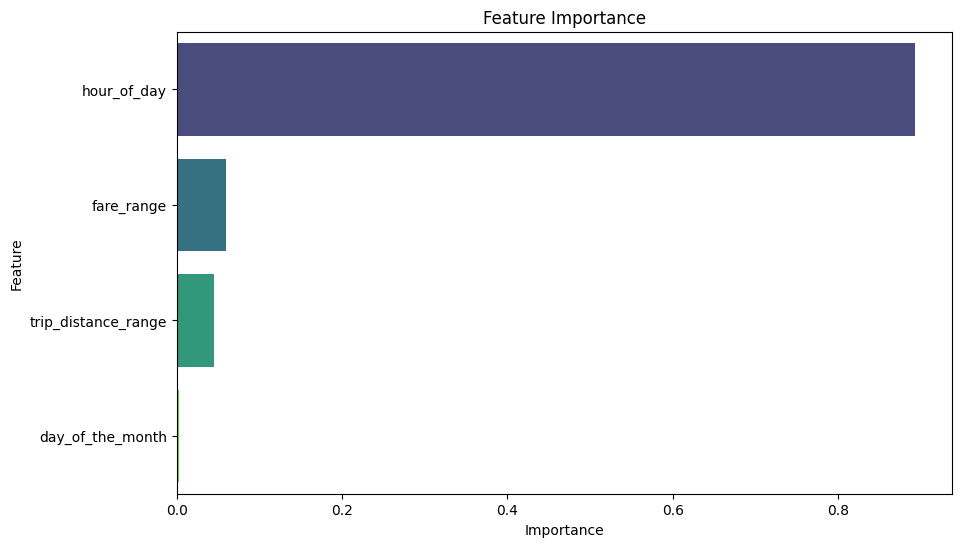

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained RandomForestRegressor model
feature_importances = model.featureImportances.toArray()

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({"Feature": feature_columns, "Importance": feature_importances})

# Sort the DataFrame by Importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance")
plt.show()


23/12/05 01:34:26 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:34:26 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:34:27 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:34:27 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:34:27 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:34:27 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:34:27 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:34:27 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:34:27 WARN RowBasedKeyValueBatch: Calling spill() on

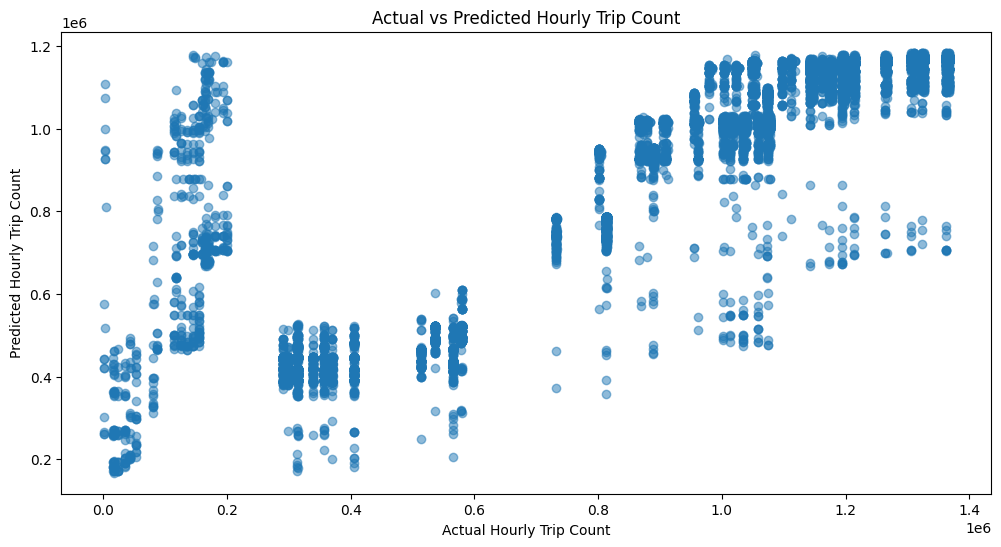

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert Spark DataFrame to Pandas DataFrame for easier visualization
predictions_pd = predictions.select("hour_of_day", "day_of_the_month", "fare_range", "trip_distance_range", "hourly_trip_count", "prediction").toPandas()

# Plotting actual vs predicted hourly_trip_count
plt.figure(figsize=(12, 6))
plt.scatter(predictions_pd["hourly_trip_count"], predictions_pd["prediction"], alpha=0.5)
plt.title("Actual vs Predicted Hourly Trip Count")
plt.xlabel("Actual Hourly Trip Count")
plt.ylabel("Predicted Hourly Trip Count")
plt.show()



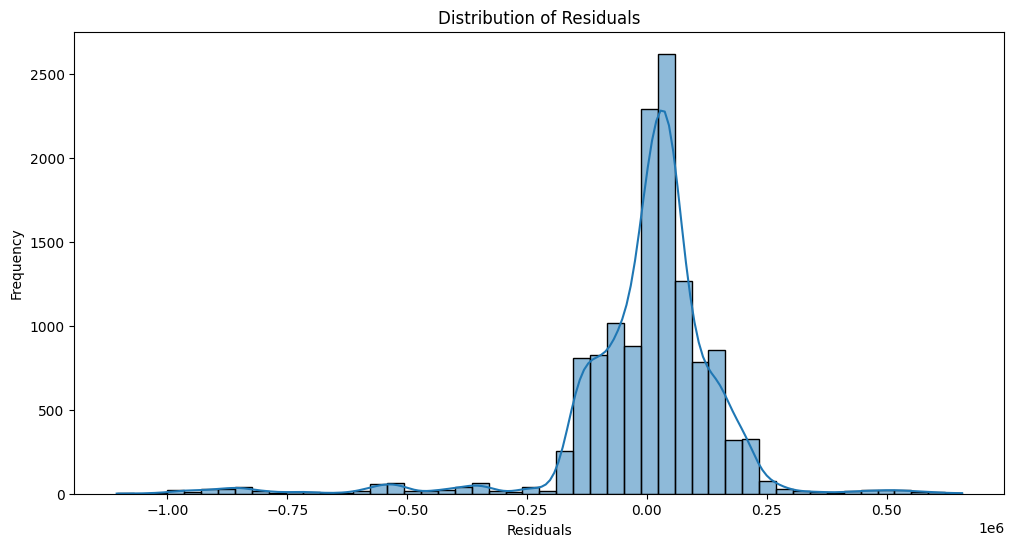

In [43]:
# Distribution of residuals
plt.figure(figsize=(12, 6))
sns.histplot(predictions_pd["hourly_trip_count"] - predictions_pd["prediction"], bins=50, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()



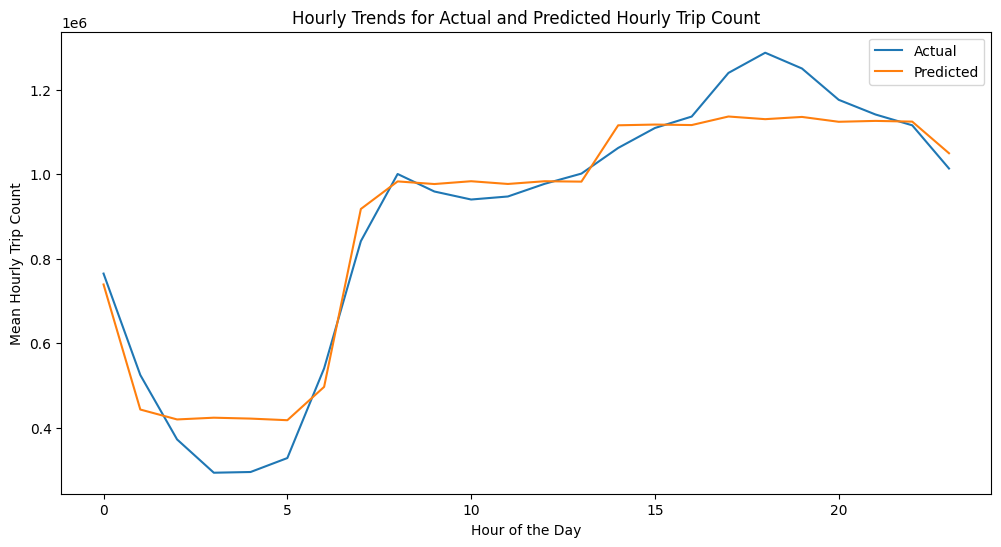

In [44]:

# Hourly trends for actual and predicted hourly_trip_count
hourly_trends = predictions_pd.groupby("hour_of_day")[["hourly_trip_count", "prediction"]].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x="hour_of_day", y="hourly_trip_count", data=hourly_trends, label="Actual")
sns.lineplot(x="hour_of_day", y="prediction", data=hourly_trends, label="Predicted")
plt.title("Hourly Trends for Actual and Predicted Hourly Trip Count")
plt.xlabel("Hour of the Day")
plt.ylabel("Mean Hourly Trip Count")
plt.legend()
plt.show()

23/12/05 01:35:25 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:35:25 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:35:25 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:35:25 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:35:25 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:35:25 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:35:25 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:35:25 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:35:25 WARN RowBasedKeyValueBatch: Calling spill() on

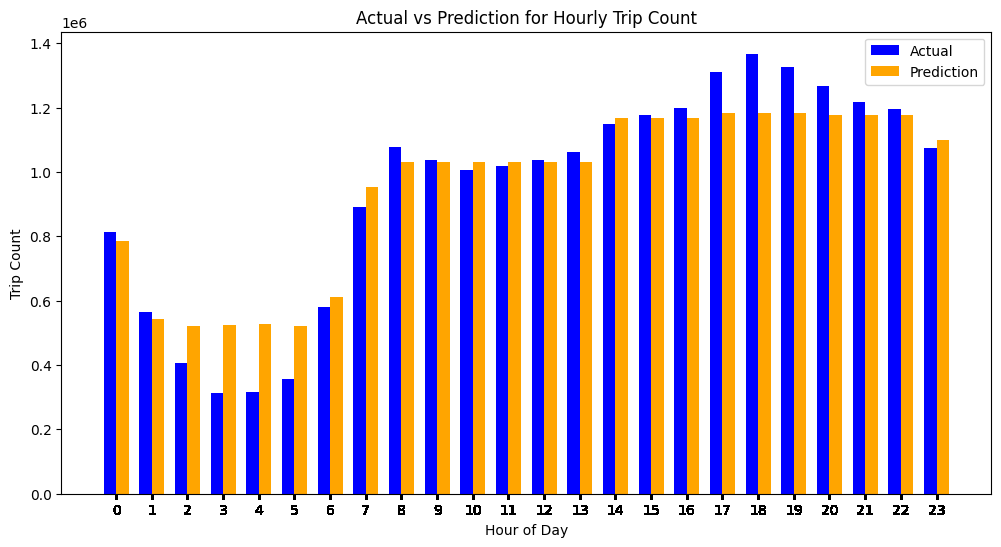

In [45]:
import matplotlib.pyplot as plt

# Convert the PySpark DataFrame to Pandas for plotting
predictions_pd = predictions.select("hour_of_day", "hourly_trip_count", "prediction").toPandas()

# Plot bar chart for both actual and predicted values
plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(predictions_pd["hour_of_day"] - bar_width/2, predictions_pd["hourly_trip_count"], bar_width, label='Actual', color='blue')
plt.bar(predictions_pd["hour_of_day"] + bar_width/2, predictions_pd["prediction"], bar_width, label='Prediction', color='orange')

plt.title('Actual vs Prediction for Hourly Trip Count')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Count')
plt.xticks(predictions_pd["hour_of_day"])
plt.legend()

plt.show()


In [47]:
selected_df = predictions.select("hour_of_day", "day_of_the_month", "fare_range", "trip_distance_range", "hourly_trip_count", "prediction")
selected_df.write.csv("hourly_predictions_sept.csv", header=True, mode="overwrite")

23/12/05 01:42:43 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:42:43 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:42:43 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:42:43 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:42:43 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:42:43 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:42:43 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:42:43 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/12/05 01:42:44 WARN RowBasedKeyValueBatch: Calling spill() on